<div class="div_image pull-right">
    <div class = "image image_topic pull-right">
        <img src = "https://i.imgur.com/EGtMXKh.jpg?1">
    </div>
</div>

# <b>Capstone Project: Predicting Dota 2 Match Wins using Machine Learning and Recommender System (Data Modelling)</b>


In part 2, we did some data cleaning and EDA. In this section, we will first be modelling our data using traditional modeling techniques to determine if we are able to predict win rates based on machine learning algorithms.

# Importing Libraries

In [1]:
import pandas as pd
from pycaret.classification import *
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import CSV data

model_df = pd.read_csv("preprocessed_data.csv")

model_df.shape


(82380, 247)

# Data Preprocessing

First, we need to map our Boolean values to binary values in order to feed into our machine learning models.

In [3]:
# Mapping 0 to False (radiant_loss) and 1 for True (radiant_win)
model_df['radiant_win'] = model_df['radiant_win'].map({False: 0, True: 1})


We will then need to train test split our model to generate a holdout sample.

In [4]:
# Creating our X and y variables

X = model_df.drop("radiant_win", axis=1)
y = model_df["radiant_win"]

# Train test split our data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.1)


In [23]:
y_train.value_counts(normalize = True)

1    0.50062
0    0.49938
Name: radiant_win, dtype: float64

We will be using the pycaret library to help us test on several classification models.

In [5]:
# Creating our training set

pycaret = pd.concat([X_train, y_train], axis=1)


In [6]:
# Creating numeric columns to feed into our machine learning algorithm
numeric_columns = (pycaret.columns)[:-1].tolist()

In [7]:
# Setup our pycaret parameters

model1 = setup(data=pycaret, target='radiant_win', session_id=123, use_gpu=True, fold = 5, numeric_features=numeric_columns)

,Description,Value
0,session_id,123
1,Target,radiant_win
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(74142, 247)"
5,Missing Values,False
6,Numeric Features,246
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


I've decided to go with <b>Accuracy</b> as the main comparison metric as the target variable dataset is balanced, and that there is no major downside if our model predicts the match victory wrongly.

In [8]:
#Compare the model performance
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5541,0.5745,0.5567,0.5535,0.5551,0.1082,0.1082,0.4180
ridge,Ridge Classifier,0.5540,0.0000,0.5567,0.5534,0.5551,0.1079,0.1079,0.1860
lda,Linear Discriminant Analysis,0.5540,0.5745,0.5569,0.5535,0.5552,0.1081,0.1081,2.0120
catboost,CatBoost Classifier,0.5502,0.5701,0.5512,0.5498,0.5505,0.1003,0.1003,39.5900
nb,Naive Bayes,0.5484,0.5641,0.5666,0.5464,0.5563,0.0968,0.0968,0.2460
ada,Ada Boost Classifier,0.5475,0.5657,0.5522,0.5470,0.5493,0.0951,0.0952,4.1900
svm,SVM - Linear Kernel,0.5473,0.0000,0.5114,0.5511,0.5290,0.0946,0.0952,1.3660
gbc,Gradient Boosting Classifier,0.5463,0.5640,0.5594,0.5449,0.5520,0.0926,0.0927,15.7000
lightgbm,Light Gradient Boosting Machine,0.5462,0.5639,0.5483,0.5457,0.5470,0.0923,0.0923,0.4980
rf,Random Forest Classifier,0.5408,0.5554,0.5179,0.5424,0.5299,0.0815,0.0816,7.5520


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

As seen from the table above, the logistic regression model gives us the best accuracy. However, the performance is poor, with only a 55.41% accuracy. This is only ~5% better than our dummy classifier of 50%, which is our base model. This indicates that at first glance, hero selection only plays a small role in a match victory.

To continue, we will tune our model logistic regression model to first see if the are any improvements in our accuracy score.

In [9]:
model_lr = create_model('lr', return_train_score = True)

In [10]:
tuned_model_lr = tune_model(model_lr, choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5523,0.5699,0.5518,0.5521,0.5519,0.1046,0.1046
1,0.5528,0.5742,0.5543,0.5524,0.5533,0.1056,0.1056
2,0.5470,0.5647,0.5516,0.5463,0.5489,0.0940,0.0940
3,0.5589,0.5820,0.5629,0.5581,0.5605,0.1177,0.1177
4,0.5602,0.5817,0.5641,0.5595,0.5618,0.1203,0.1203
Mean,0.5542,0.5745,0.5569,0.5537,0.5553,0.1085,0.1085
Std,0.0048,0.0067,0.0055,0.0047,0.0050,0.0096,0.0096


From tuning, we see that accuracy score did not improve significantly. 

We will then plot the confusion matrix to take at the False Positives and Negatives.

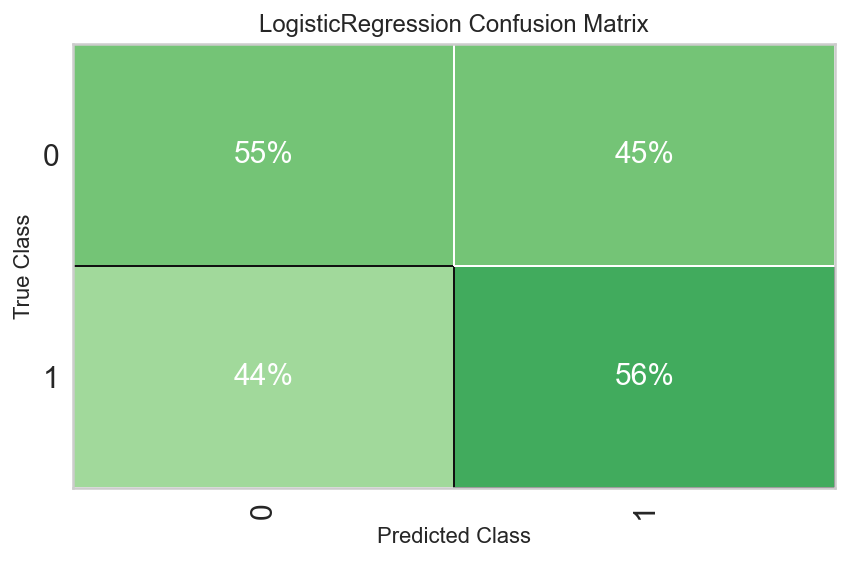

In [25]:
# Plot confusion matrix percentage
plot_model(tuned_model_lr, plot = 'confusion_matrix', plot_kwargs = {'percent': True}, scale = 2)

From the confusion matrix, we see that we have a 44% false negative score, and a 45% false positive score.

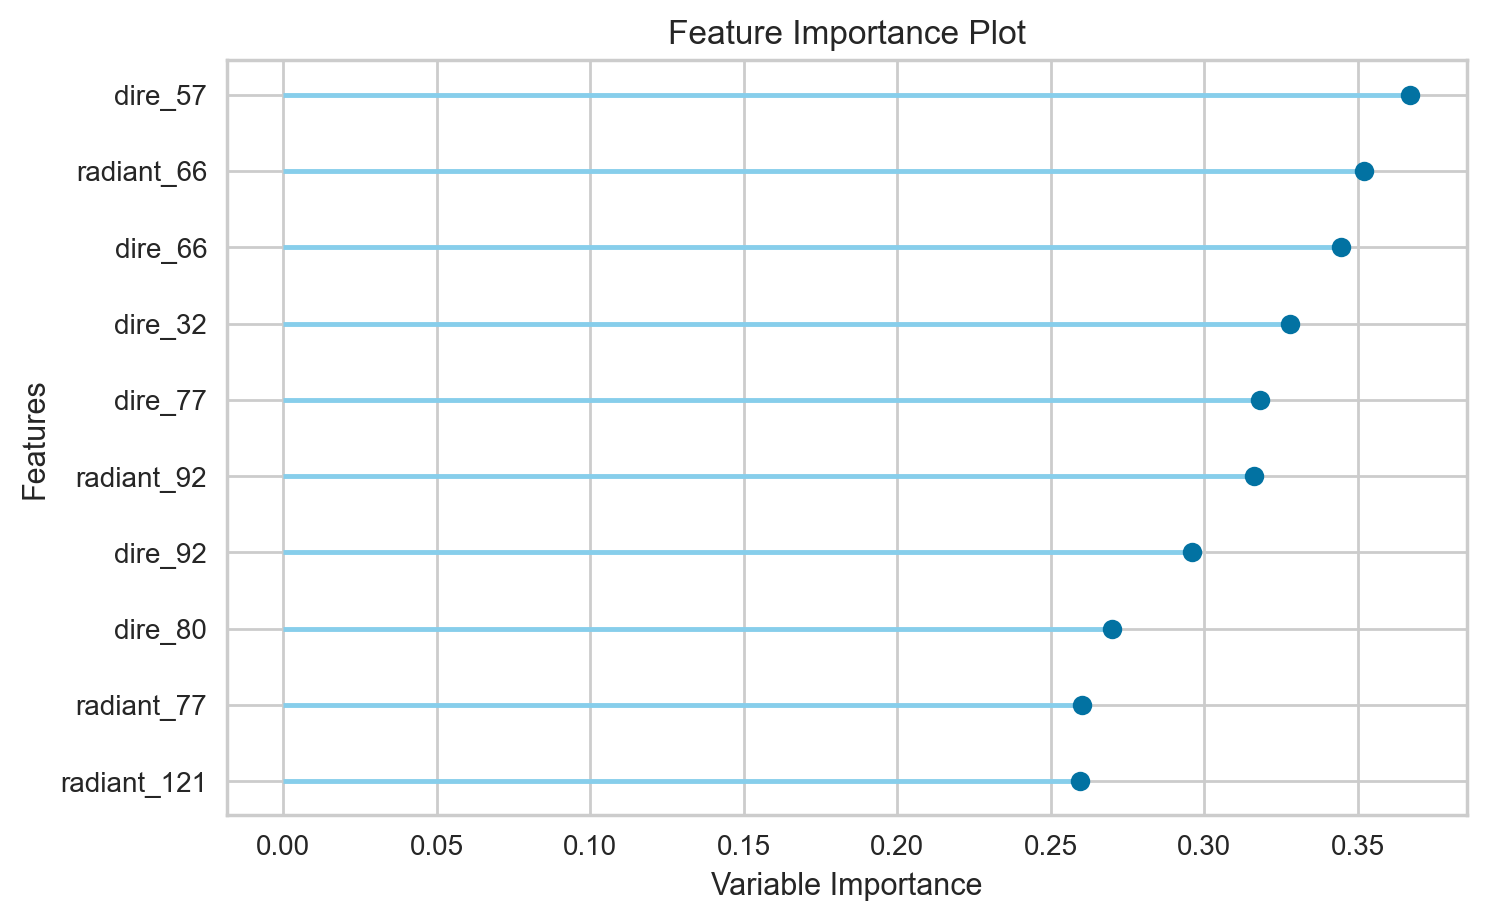

In [28]:
#Plot feature importance
plot_model(tuned_model_lr, plot = 'feature', scale = 2)

From the graph, we see that there are certain heroes that play the biggest roles in determine the outcome of a match.

Comparing with our individual winrates in our EDA section, to no surprise, we see that most of the heroes with the highest individual win rate are the ones with the best contribution. This is unsurprisng as we would also expect the best players to choose the most favorable heroes in their match in order to maximise their chances of winning. This also creates a boon effect where the heroes' winrate would increase as more skilled players play such heroes.

There is one exception ,which is hero 121, corresponding to Grimstroke, which falls within one of our lowest win rate heroes. It seems that based on the data, we find that having a player choose Grimstroke would negatively impact the winrate significantly of the team, which may show that this hero is underpowered in the current meta. 

We would use the model to predict on our test dataset.

In [21]:
#Predicting model on our train dataset
predict_model(tuned_model_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5545,0.5754,0.5563,0.5570,0.5567,0.1090,0.1090


,radiant_1,radiant_10,radiant_100,radiant_101,radiant_102,radiant_103,radiant_104,radiant_105,radiant_106,radiant_107,...,dire_93,dire_94,dire_95,dire_96,dire_97,dire_98,dire_99,radiant_win,Label,Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.6256
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5775
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.6080
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.5844
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5535
22239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.6774
22240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5560
22241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5268


In [33]:
#Predicting model on our test dataset
final_model = finalize_model(tuned_model_lr)

test_data = pd.concat([X_test, y_test], axis = 1)

predictions = predict_model(final_model, raw_score = True, data = test_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5630,0.5819,0.5676,0.5570,0.5623,0.1261,0.1261


# Summary of insights

Our model on our test dataset shows slightly better results. This could be because we trained our model on the full dataset instead. However, with such a dismal accuracy, we would need to look at more complex models to determine if hero selection.

One limitation of the current models is that they only take into account each individual hero on its own and that each hero is independent from each other's opponent or teammate. This however fails to capture the synergies between heroes and how teams can be strengthened when paired up with certain heroes. Conversely, this can also apply to opponents where matches against certain heroes are poor as certain heroes may counter other heroes strengths.

To take into account the cooperative and competitive synergies that are present in the game, we will build a neural network model to see if this will help us predict the match wins better.